In [5]:
#練習爬取所有貨幣對台幣的匯率資料
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd

url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
resp = requests.get(url)
resp.encoding = 'utf-8'

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

print("幣別\t\t本行現金買入\t本行現金賣出\t本行即期買入\t本行即期賣出")

for d in rate_table:
    currency = d.find(name='div', attrs={'class':'visible-phone print_hide'})       #幣別
    buy_rate = d.find(name='td', attrs={'data-table':'本行現金買入'})   
    sell_rate = d.find(name='td', attrs={'data-table':'本行現金賣出'})
    buy_rate2 = d.find(name='td', attrs={'data-table':'本行即期買入'})   
    sell_rate2 = d.find(name='td', attrs={'data-table':'本行即期賣出'})
    
    print(currency.get_text().replace(" ", "").strip()+"\t"+buy_rate.get_text()+"\t\t"+sell_rate.get_text()+"\t\t"+buy_rate2.get_text()+"\t\t"+sell_rate2.get_text(), end="\n")  

幣別		本行現金買入	本行現金賣出	本行即期買入	本行即期賣出
美金(USD)	29.66		30.33		30.01		30.11
港幣(HKD)	3.714		3.918		3.84		3.9
英鎊(GBP)	37.59		39.71		38.59		39.01
澳幣(AUD)	19.22		20		19.49		19.72
加拿大幣(CAD)	21.45		22.36		21.84		22.06
新加坡幣(SGD)	21.04		21.95		21.53		21.71
瑞士法郎(CHF)	31.33		32.53		31.99		32.28
日圓(JPY)	0.277		0.2898		0.2843		0.2883
南非幣(ZAR)	-		-		1.842		1.922
瑞典幣(SEK)	2.79		3.31		3.13		3.23
紐元(NZD)	18.5		19.35		18.88		19.08
泰幣(THB)	0.828		1.018		0.9404		0.9804
菲國比索(PHP)	0.5213		0.6543		-		-
印尼幣(IDR)	0.00173		0.00243		-		-
歐元(EUR)	33.24		34.58		33.86		34.26
韓元(KRW)	0.02344		0.02734		-		-
越南盾(VND)	0.00092		0.00142		-		-
馬來幣(MYR)	5.982		7.607		-		-
人民幣(CNY)	4.223		4.385		4.295		4.345


幣別:美金(USD)


<Figure size 720x576 with 0 Axes>

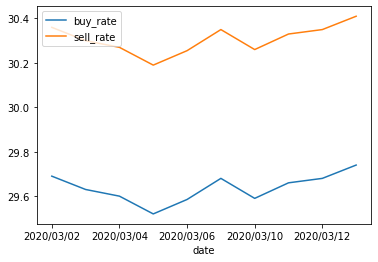

幣別:港幣(HKD)


<Figure size 720x576 with 0 Axes>

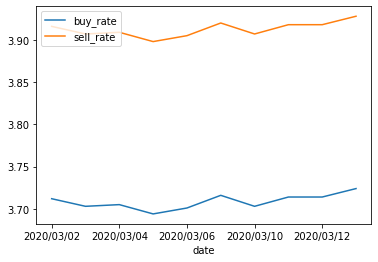

幣別:英鎊(GBP)


<Figure size 720x576 with 0 Axes>

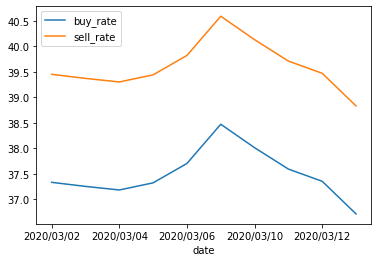

幣別:澳幣(AUD)


<Figure size 720x576 with 0 Axes>

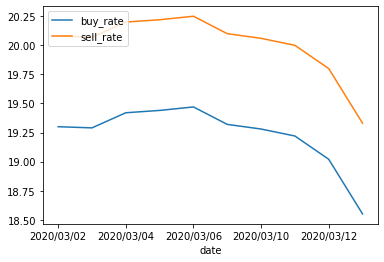

幣別:加拿大幣(CAD)


<Figure size 720x576 with 0 Axes>

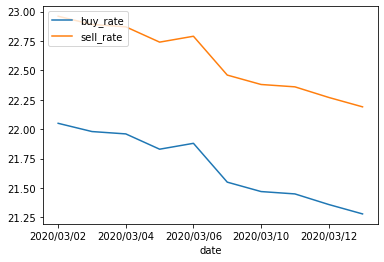

幣別:新加坡幣(SGD)


<Figure size 720x576 with 0 Axes>

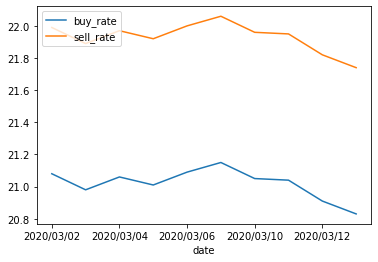

幣別:瑞士法郎(CHF)


<Figure size 720x576 with 0 Axes>

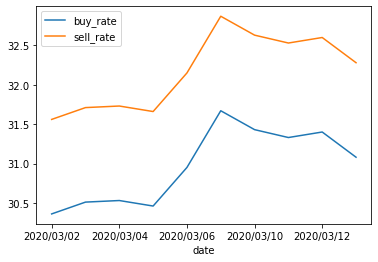

幣別:日圓(JPY)


<Figure size 720x576 with 0 Axes>

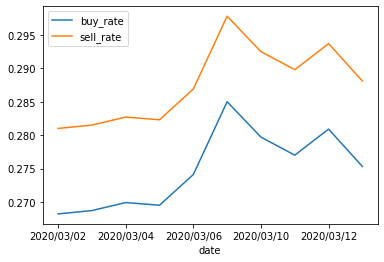

幣別:南非幣(ZAR)


<Figure size 720x576 with 0 Axes>

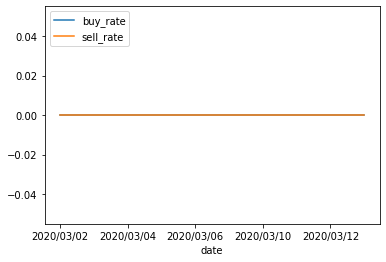

幣別:瑞典幣(SEK)


<Figure size 720x576 with 0 Axes>

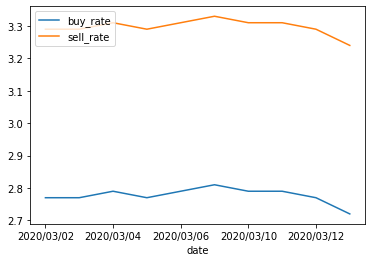

幣別:紐元(NZD)


<Figure size 720x576 with 0 Axes>

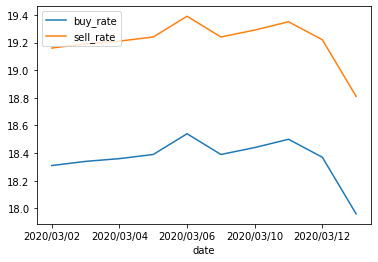

幣別:泰幣(THB)


<Figure size 720x576 with 0 Axes>

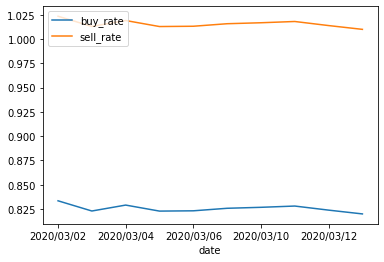

幣別:菲國比索(PHP)


<Figure size 720x576 with 0 Axes>

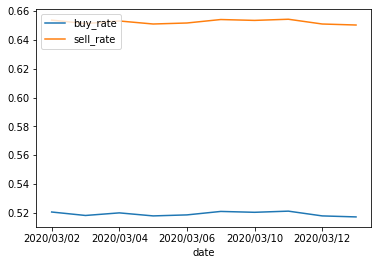

幣別:印尼幣(IDR)


<Figure size 720x576 with 0 Axes>

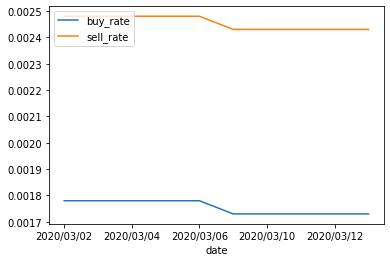

幣別:歐元(EUR)


<Figure size 720x576 with 0 Axes>

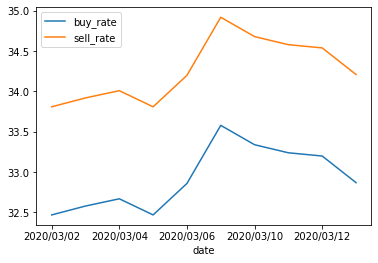

幣別:韓元(KRW)


<Figure size 720x576 with 0 Axes>

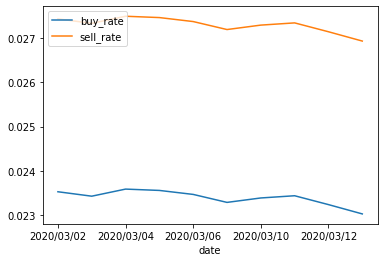

幣別:越南盾(VND)


<Figure size 720x576 with 0 Axes>

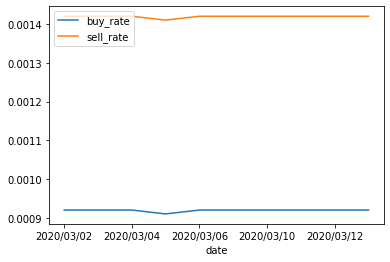

幣別:馬來幣(MYR)


<Figure size 720x576 with 0 Axes>

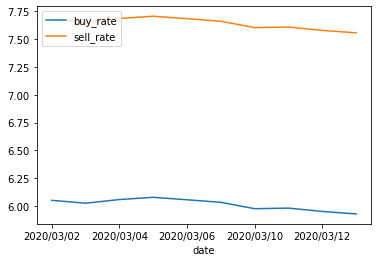

幣別:人民幣(CNY)


<Figure size 720x576 with 0 Axes>

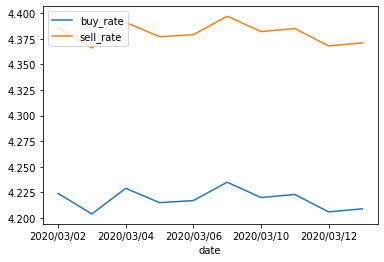

In [5]:
#爬取202003每種貨幣對台幣歷史匯率資料，並畫出趨勢圖
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

for d in rate_table:
    currency = d.find(name='div', attrs={'class':'visible-phone print_hide'})   
    history_link = d.find(name='td', attrs={'data-table':'歷史匯率'})
    history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 美金的歷史資料首頁

    # 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
    quote_history_url = history_rate_link.replace("history", "quote/2020-03")
    resp = requests.get(quote_history_url)
    resp.encoding = 'utf-8'
    history = BeautifulSoup(resp.text, "lxml")
    history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

    #宣告List變數
    date_history = list()
    history_buy = list()
    history_sell = list()

    #彙整資料
    for history_rate in history_table:
        date_string = history_rate.a.get_text()   #日期字串
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
        date_history.append(date)  # 日期歷史資料

        history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
        history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

    # 將匯率資料建成dataframe形式
    HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                        'buy_rate':history_buy,
                                        'sell_rate':history_sell})

    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

    # 畫出歷史匯率軌跡圖
    print("幣別:" + currency.get_text().replace(" ", "").strip())
    plt.figure(figsize=(10, 8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  
    plt.legend(loc="upper left")
    plt.show()